<a href="https://colab.research.google.com/github/harshvs4/CIFAR100/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data.dataloader import DataLoader
from collections import Counter

In [2]:
train_dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data/


In [3]:
train_dataset_size = len(train_dataset)
train_dataset_size

50000

In [4]:
test_dataset_size = len(test_dataset)
test_dataset_size

10000

Mean and standard deviation of the dataset

In [5]:
print(train_dataset.data.mean(axis=(0,1,2))/255)
print(train_dataset.data.std(axis=(0,1,2))/255)

[0.49139968 0.48215841 0.44653091]
[0.24703223 0.24348513 0.26158784]


In [6]:
classes = train_dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
num_classes = len(classes)
num_classes

10

In [8]:
class_label = []
for img, label in train_dataset:
    class_label.append(label)

Counter(class_label)

Counter({6: 5000,
         9: 5000,
         4: 5000,
         1: 5000,
         2: 5000,
         7: 5000,
         8: 5000,
         3: 5000,
         5: 5000,
         0: 5000})

In [9]:
class_label = []
for img, label in test_dataset:
    class_label.append(label)

Counter(class_label)

Counter({3: 1000,
         8: 1000,
         0: 1000,
         6: 1000,
         1: 1000,
         9: 1000,
         5: 1000,
         7: 1000,
         4: 1000,
         2: 1000})

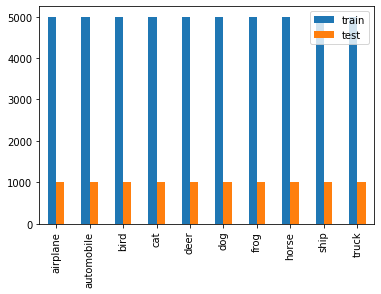

In [10]:
import pandas as pd

_, train_counts = np.unique(train_dataset.targets, return_counts=True)
_, test_counts = np.unique(test_dataset.targets, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=train_dataset.classes
            ).plot.bar()
plt.show()

In [12]:
print(_,train_counts)

[0 1 2 3 4 5 6 7 8 9] [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [13]:
img, label = train_dataset[0]
img_shape = img.shape
img_shape

torch.Size([3, 32, 32])

Note that this dataset consists of 3-channel color images (RGB). Let us look at a sample image from the dataset. matplotlib expects channels to be the last dimension of the image tensors (whereas in PyTorch they are the first dimension), so we'll the .permute tensor method to shift channels to the last dimension. Let's also print the label for the image. This line of code is using the permute method from the img object in Python. It is likely that img is a multi-dimensional array-like object, such as a NumPy array or PyTorch tensor.The permute method rearranges the dimensions of a multi-dimensional array.The argument (1, 2, 0) specifies the desired order of the dimensions. The original order of the dimensions is changed to (1, 2, 0), where the first dimension becomes the second, 
the second dimension becomes the third, and the third dimension becomes the first.For example, if img is a 3-dimensional tensor with dimensions (3, 256, 256), the output of img.permute((1, 2, 0)) will be a tensor with dimensions (256, 256, 3).

Label (numeric): 8
Label (textual): ship


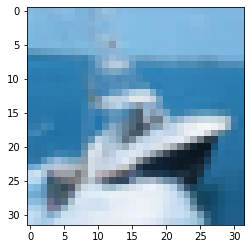

In [16]:
img, label = train_dataset[8]
plt.imshow(img.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])

In [17]:
train_sizes_loader = DataLoader(dataset=train_dataset,
                             batch_size=1,
                             shuffle=False,
                             num_workers=2)

img_shape = []
for batch in train_sizes_loader:
    img_shape.append(torch.tensor(batch[0].size()).tolist())
    
from collections import Counter
Counter([tuple(i) for i in img_shape])

Counter({(1, 3, 32, 32): 50000})

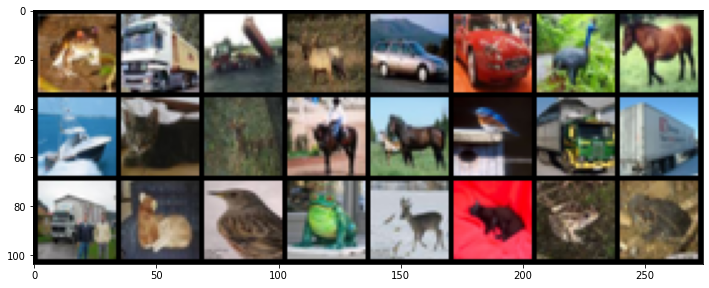

In [19]:
# functions to show an image
fig, ax = plt.subplots(figsize=(12, 12))

def imshow(img):
    img = img      # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

train_loader = DataLoader(dataset=train_dataset,
                             batch_size=30,
                             shuffle=False,
                             num_workers=2)
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images[:24]))

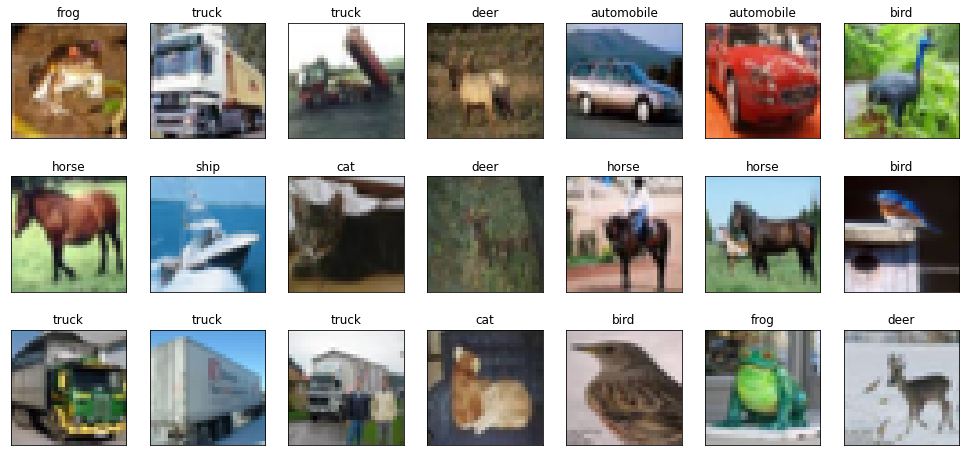

In [20]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(classes[train_dataset[index][1]])
        axes[i,j].imshow(np.transpose(train_dataset[index][0].numpy(), (1,2,0)))
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [27]:
classes[train_dataset[4][1]]

'automobile'

In [ ]:
train_dataset[1][0].numpy()

In [32]:
sample_dict = {}

for i, classlabel in enumerate(classes):
  images_list = [index for index, (image, label) in enumerate(train_dataset) if label == i]
  # randomly select 10 of each
  sample_dict[classlabel] = np.random.choice(images_list, 10, replace = False)

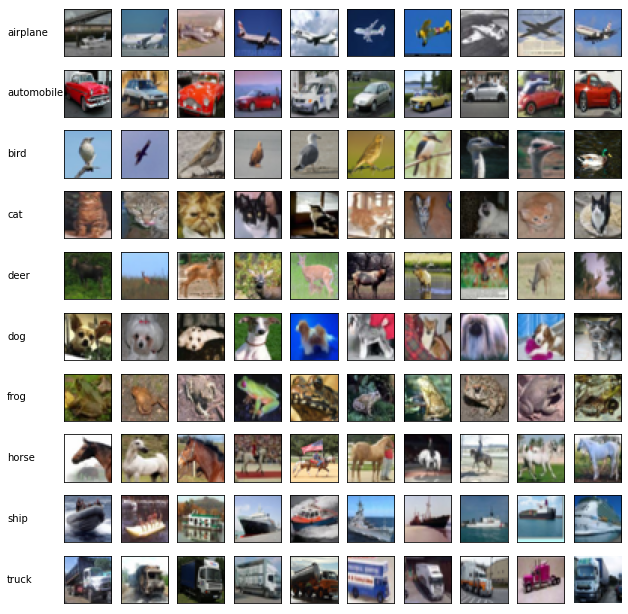

In [33]:
fig, axes = plt.subplots(ncols=11, nrows=10, figsize=(11, 11))
index = 0
for i, classlabel in enumerate(classes):
    axes[i][0].text(x = 0, y = 0.5, s = classlabel, rotation = 0, va = "center")
    axes[i][0].get_xaxis().set_visible(False)
    axes[i][0].get_yaxis().set_visible(False)
    axes[i][0].spines['top'].set_visible(False)
    axes[i][0].spines['right'].set_visible(False)
    axes[i][0].spines['bottom'].set_visible(False)
    axes[i][0].spines['left'].set_visible(False)
    for j in range(1, 11):
        axes[i,j].imshow(np.transpose(train_dataset[sample_dict[classlabel][j-1]][0].numpy(), (1,2,0)))
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.axis('off')
plt.show()